In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [4]:
# 1. Last inn data
df = pd.read_csv("../data/data2.csv")
df.columns

Index(['alder', 'lonn', 'utdanning', 'sko_str', 'avdeling', 'er_leder',
       'favorittfarge', 'ansiennitet', 'prestasjonsscore'],
      dtype='object')

=== Beskrivende statistikk ===

alder:
  Mean: 31.69
  Median: 32.00
  Std: 7.23


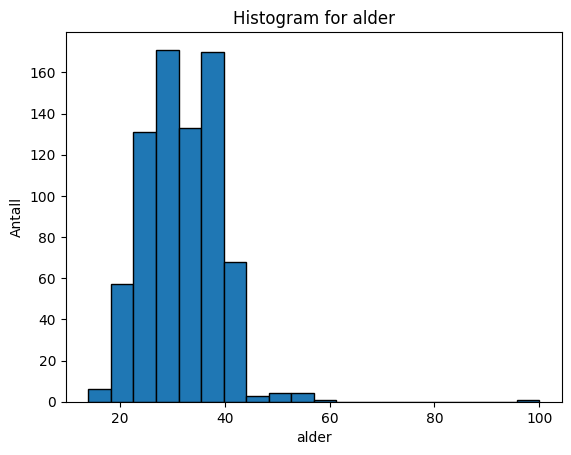


lonn:
  Mean: 890029.70
  Median: 704614.00
  Std: 371359.16


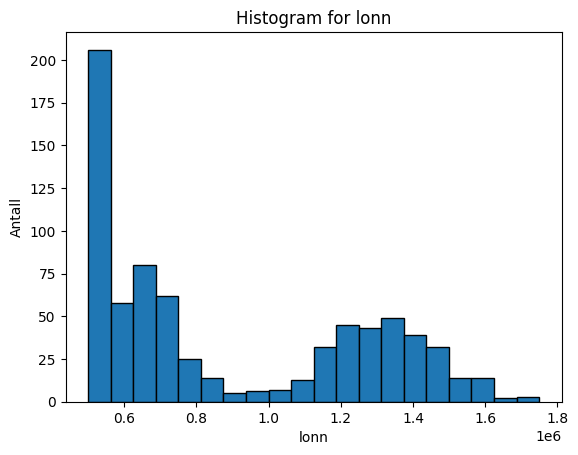

In [5]:
# ---- 1. Beskrivende statistikk og uteliggere ----
print("=== Beskrivende statistikk ===")
for col in ["alder", "lonn"]:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std: {df[col].std():.2f}")

    # Histogram
    plt.hist(df[col], bins=20, edgecolor="black")
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel("Antall")
    plt.show()

In [15]:
print("\n=== Korrelasjoner ===")
# Bruk bare numeriske kolonner (dropp 'constant_feature' som er meningsløs)
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

# Hent topp-3 korrelasjoner
corr_pairs = (
    corr_matrix.unstack()
    .sort_values(key=lambda x: abs(x), ascending=False)
)


=== Korrelasjoner ===
                     alder      lonn  utdanning   sko_str  er_leder  \
alder             1.000000  0.574920   0.154832 -0.453447  0.123545   
lonn              0.574920  1.000000   0.061272 -0.416981  0.221427   
utdanning         0.154832  0.061272   1.000000  0.005555  0.031408   
sko_str          -0.453447 -0.416981   0.005555  1.000000 -0.054330   
er_leder          0.123545  0.221427   0.031408 -0.054330  1.000000   
ansiennitet       0.559458  0.565564   0.059726 -0.450931  0.054267   
prestasjonsscore -0.022792  0.145236   0.038468  0.035841  0.055246   

                  ansiennitet  prestasjonsscore  
alder                0.559458         -0.022792  
lonn                 0.565564          0.145236  
utdanning            0.059726          0.038468  
sko_str             -0.450931          0.035841  
er_leder             0.054267          0.055246  
ansiennitet          1.000000          0.014116  
prestasjonsscore     0.014116          1.000000  


In [22]:
# Fjern selv-korrelasjoner
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
top3 = corr_pairs[:5]
print(top3)

lonn         alder          0.574920
alder        lonn           0.574920
lonn         ansiennitet    0.565564
ansiennitet  lonn           0.565564
             alder          0.559458
dtype: float64



=== Gjennomsnittlig lønn per avdeling ===
avdeling
Utvikling    1.336790e+06
Finans       9.347135e+05
HR           6.868998e+05
Salg         5.626173e+05
Name: lonn, dtype: float64


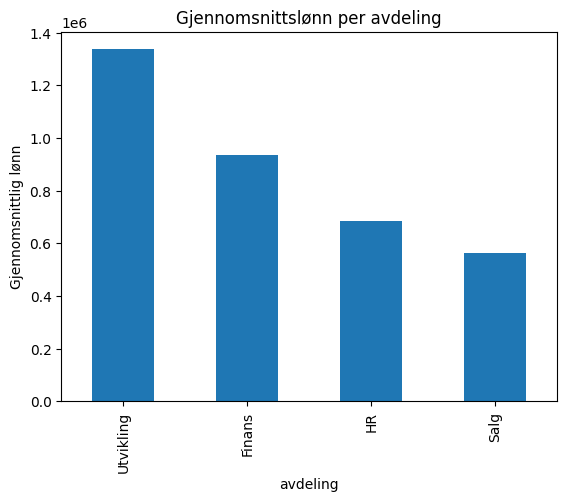

In [18]:

print("\n=== Gjennomsnittlig lønn per avdeling ===")
dept_salary = df.groupby("avdeling")["lonn"].mean().sort_values(ascending=False)
print(dept_salary)

dept_salary.plot(kind="bar")
plt.title("Gjennomsnittslønn per avdeling")
plt.ylabel("Gjennomsnittlig lønn")
plt.show()

In [21]:
import pandas as pd

# Samlet korrelasjon
overall_corr = df["alder"].corr(df["lonn"])
print(f"Samlet korrelasjon (hele datasettet): {overall_corr:.3f}")

# Korrelasjon per department
print("\nKorrelasjon per avdeling:")
for dept, group in df.groupby("avdeling"):
    if len(group) > 2:  # må ha nok data
        corr = group["alder"].corr(group["lonn"])
        print(f"  {dept:15}: {corr:.3f}")

# Korrelasjon per favorite_color
print("\nKorrelasjon per favorittfarge:")
for color, group in df.groupby("favorittfarge"):
    if len(group) > 2:
        corr = group["alder"].corr(group["lonn"])
        print(f"  {color:15}: {corr:.3f}")


Samlet korrelasjon (hele datasettet): 0.575

Korrelasjon per avdeling:
  Finans         : -0.032
  HR             : 0.175
  Salg           : -0.197
  Utvikling      : 0.303

Korrelasjon per favorittfarge:
  blaa           : 0.642
  groen          : 0.639
  roed           : 0.476


In [7]:
features = ["alder", "education_years", "shoe_size"]
df=df.dropna()
X = df[features]
y = df["salary"]

model = LinearRegression()
model.fit(X, y)

print("Koefisienter:")
for f, coef in zip(features, model.coef_):
    print(f"  {f}: {coef:.3f}")
print(f"Intercept: {model.intercept_:.3f}")

# Prediksjonseksempel
y_pred = model.predict(X)
print("\nFørste 5 prediksjoner vs faktiske verdier:")
print(pd.DataFrame({"Pred": y_pred[:5], "Faktisk": y[:5]}))

Koefisienter:
  age: -3.696
  education_years: 2445.463
  shoe_size: 734.666
Intercept: 28264.619

Første 5 prediksjoner vs faktiske verdier:
           Pred        Faktisk
0  86641.994684  104149.582987
1  93724.782102  103639.346797
2  82024.500760   79898.402214
3  85910.509372   75867.274392
4  92077.929648  102361.234472
